# Поиск частых наборов
## Ращупкин ЕВ КЭ-120
### Задание:
    Выполните поиск частых наборов объектов в наборе данных с помощью следующих алгоритмов (или их модификаций): Apriori, FP‑Growth, ECLAT. Варьируйте пороговое значение поддержки (например: 1%, 3%, 5%, 10%, 15%, 20%). Проверьте идентичность результатов, полученных с помощью различных алгоритмов.
    Подготовьте список частых наборов, в которых не более семи объектов (разумное количество). Проанализируйте и изложите содержательный смысл полученного результата.
    Выполните визуализацию полученных результатов в виде следующих диаграмм: 
        сравнение быстродействия алгоритмов на фиксированном наборе данных при изменяемом пороге поддержки; 
        общее количество частых наборов объектов на фиксированном наборе данных при изменяемом пороге поддержки; 
        максимальная длина частого набора объектов на фиксированном наборе данных при изменяемом пороге поддержки; 
        количество частых наборов объектов различной длины на фиксированном наборе данных при изменяемом пороге поддержки.
    Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой связный и структурированный документ со следующими разделами:  
        формулировка задания; 
        гиперссылка на каталог репозитория с исходными текстами, набором данных и др. сопутствующими материалами; 
        рисунки с результатами визуализации; 
        пояснения, раскрывающие смысл полученных результатов.

In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install mlxtend
#!pip install pyECLAT

In [2]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
from pyECLAT import ECLAT

In [3]:
# Список частых наборов, в которых 6 объектов 50 транзакций 
dataset = [
    ["молоко", "хлеб", "яйца", "соль"],
    ["молоко", "хлеб"],
    ["хлеб", "яйца", "соль"],
    ["молоко", "яйца", "соль"],
    ["молоко", "хлеб", "яйца", "масло", "соль"],
    ["хлеб", "масло"],
    ["молоко", "яйца", "масло", "хлеб"],
    ["хлеб", "яйца", "масло", "соль"],
    ["молоко", "хлеб", "масло"],
    ["яйца", "масло", "соль"],
    ["молоко", "хлеб", "яйца"],
    ["хлеб", "сахар"],
    ["молоко", "хлеб", "масло"],
    ["яйца", "молоко"],
    ["молоко", "хлеб", "яйца"],
    ["молоко", "соль", "сахар"],
    ["хлеб", "яйца", "масло", "сахар"],
    ["молоко", "масло", "соль"],
    ["яйца", "хлеб", "соль"],
    ["молоко", "хлеб", "яйца", "масло"],
    ["хлеб", "яйца"],
    ["молоко", "сахар"],
    ["масло", "соль"],
    ["молоко", "хлеб", "яйца", "соль", "сахар"],
    ["хлеб", "яйца", "масло", "молоко"],
    ["молоко", "хлеб", "соль"],
    ["яйца", "масло", "хлеб"],
    ["молоко", "яйца", "сахар"],
    ["хлеб", "масло", "соль"],
    ["молоко", "яйца", "хлеб", "соль"],
    ["хлеб", "яйца", "сахар"],
    ["молоко", "масло", "яйца"],
    ["хлеб", "соль", "сахар"],
    ["молоко", "яйца", "масло", "соль"],
    ["хлеб", "яйца", "масло"],
    ["молоко", "хлеб", "соль"],
    ["яйца", "масло", "сахар"],
    ["молоко", "хлеб", "яйца", "масло"],
    ["хлеб", "яйца", "соль"],
    ["молоко", "масло", "соль"],
    ["яйца", "хлеб", "сахар"],
    ["молоко", "хлеб", "яйца"],
    ["хлеб", "масло", "соль"],
    ["молоко", "яйца", "соль"],
    ["хлеб", "яйца", "масло"],
    ["молоко", "хлеб", "соль", "сахар"],
    ["яйца", "масло", "хлеб"],
    ["молоко", "хлеб", "яйца", "масло"],
    ["хлеб", "яйца", "соль"],
    ["молоко", "масло", "сахар"],
    ["яйца", "хлеб", "соль"],
]

# Подготовка данных для mlxtend
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [4]:
# Параметры
support_values = [0.01, 0.03, 0.05, 0.1, 0.15, 0.2]
results = {'apriori': {}, 'fpgrowth': {}, 'eclat': {}}

In [5]:
# Запуск алгоритмов
for supp in support_values:
    # Apriori
    start = time.time()
    apriori_fi = apriori(df, min_support=supp, use_colnames=True)
    results['apriori'][supp] = {
        'time': time.time() - start,
        'itemsets': apriori_fi
    }
    
    # FP-Growth
    start = time.time()
    fpgrowth_fi = fpgrowth(df, min_support=supp, use_colnames=True)
    results['fpgrowth'][supp] = {
        'time': time.time() - start,
        'itemsets': fpgrowth_fi
    }
    
    # ECLAT
    eclat = ECLAT(data=pd.DataFrame(dataset))
    start = time.time()
    _, eclat_fi = eclat.fit(min_support=supp)
    itemsets = [tuple(itemset.split(' & ')) for itemset in eclat_fi.keys()]
    itemsets_series = pd.Series(itemsets, dtype=object)
    eclat_df = pd.DataFrame({'itemsets': itemsets_series, 'support': eclat_fi.values()})
    results['eclat'][supp] = {
        'time': time.time() - start,
        'itemsets': eclat_df
    }

Combination 1 by 1


6it [00:00, 223.71it/s]


Combination 2 by 2


15it [00:00, 233.26it/s]


Combination 3 by 3


20it [00:00, 216.02it/s]


Combination 1 by 1


6it [00:00, 278.77it/s]


Combination 2 by 2


15it [00:00, 187.28it/s]


Combination 3 by 3


20it [00:00, 241.93it/s]


Combination 1 by 1


6it [00:00, 257.04it/s]


Combination 2 by 2


15it [00:00, 240.53it/s]


Combination 3 by 3


20it [00:00, 270.40it/s]


Combination 1 by 1


6it [00:00, 282.56it/s]


Combination 2 by 2


15it [00:00, 239.81it/s]


Combination 3 by 3


20it [00:00, 307.81it/s]


Combination 1 by 1


6it [00:00, 250.57it/s]


Combination 2 by 2


15it [00:00, 275.93it/s]


Combination 3 by 3


20it [00:00, 353.69it/s]


Combination 1 by 1


6it [00:00, 267.65it/s]


Combination 2 by 2


15it [00:00, 294.18it/s]


Combination 3 by 3


20it [00:00, 369.06it/s]


In [6]:
# Выбираем уровень поддержки
selected_support = 0.2

# Функция для преобразования itemsets в читаемый формат
def format_itemsets(itemsets):
    return itemsets.apply(lambda x: ', '.join(list(x)))

# Для Apriori
apriori_df = results['apriori'][selected_support]['itemsets']
print(f"\nApriori (support ≥ {selected_support}):")
print(f"Найдено {len(apriori_df)} наборов, время выполнения: {results['apriori'][selected_support]['time']:.4f} сек")
print(apriori_df.assign(itemsets=format_itemsets(apriori_df['itemsets']))
       .sort_values(by='support', ascending=False)
       .head(10))

# Для FP-Growth
fpgrowth_df = results['fpgrowth'][selected_support]['itemsets']
print(f"\nFP-Growth (support ≥ {selected_support}):")
print(f"Найдено {len(fpgrowth_df)} наборов, время выполнения: {results['fpgrowth'][selected_support]['time']:.4f} сек")
print(fpgrowth_df.assign(itemsets=format_itemsets(fpgrowth_df['itemsets']))
       .sort_values(by='support', ascending=False)
       .head(10))

# Для ECLAT
eclat_df = results['eclat'][selected_support]['itemsets']
print(f"\nECLAT (support ≥ {selected_support}):")
print(f"Найдено {len(eclat_df)} наборов, время выполнения: {results['eclat'][selected_support]['time']:.4f} сек")
print(eclat_df.assign(itemsets=eclat_df['itemsets'].apply(lambda x: ', '.join(x)))
       .sort_values(by='support', ascending=False)
       .head(10))



Apriori (support ≥ 0.2):
Найдено 17 наборов, время выполнения: 0.0023 сек
     support      itemsets
4   0.725490          хлеб
5   0.666667          яйца
1   0.568627        молоко
14  0.509804    хлеб, яйца
0   0.490196         масло
3   0.470588          соль
10  0.352941  молоко, хлеб
11  0.352941  молоко, яйца
7   0.333333   масло, хлеб
8   0.313725   масло, яйца

FP-Growth (support ≥ 0.2):
Найдено 17 наборов, время выполнения: 0.0060 сек
     support      itemsets
0   0.725490          хлеб
1   0.666667          яйца
2   0.568627        молоко
6   0.509804    хлеб, яйца
4   0.490196         масло
3   0.470588          соль
7   0.352941  молоко, яйца
8   0.352941  молоко, хлеб
13  0.333333   масло, хлеб
14  0.313725   масло, яйца

ECLAT (support ≥ 0.2):
Найдено 17 наборов, время выполнения: 0.1357 сек
        itemsets   support
2           хлеб  0.725490
0           яйца  0.666667
5         молоко  0.568627
7     яйца, хлеб  0.509804
1          масло  0.490196
4           соль  0

Данные полученные разными алгоритмами совпадают
Полученный результат говорит о частых наборах одной корзины. Результат показывает то, что хлеб совместно с яйцами присутсвует в 50% случаев.

Text(0.5, 1.0, 'Сравнение быстродействия алгоритмов')

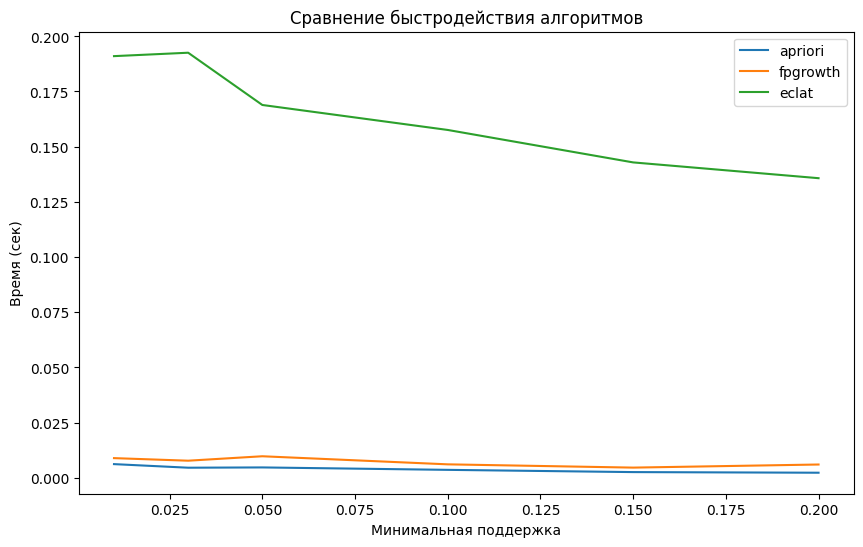

In [7]:
# Сравнение времени выполнения
plt.figure(figsize=(10, 6))
for algo in results:
    times = [results[algo][supp]['time'] for supp in support_values]
    plt.plot(support_values, times, label=algo)
plt.xlabel('Минимальная поддержка')
plt.ylabel('Время (сек)')
plt.legend()
plt.title('Сравнение быстродействия алгоритмов')


Text(0.5, 1.0, 'Общее количество частых наборов')

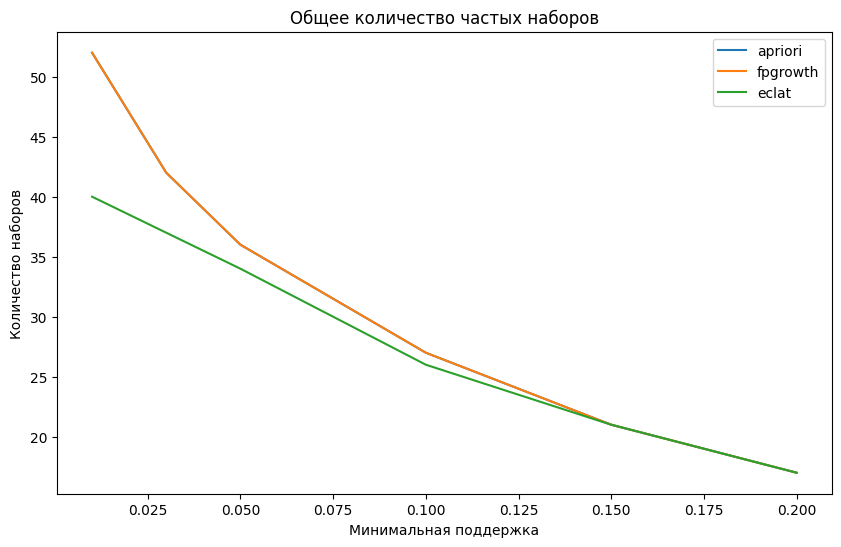

In [8]:
# Общее количество наборов
plt.figure(figsize=(10, 6))
for algo in results:
    counts = [len(results[algo][supp]['itemsets']) for supp in support_values]
    plt.plot(support_values, counts, label=algo)
plt.xlabel('Минимальная поддержка')
plt.ylabel('Количество наборов')
plt.legend()
plt.title('Общее количество частых наборов')

Text(0.5, 1.0, 'Максимальная длина частого набора')

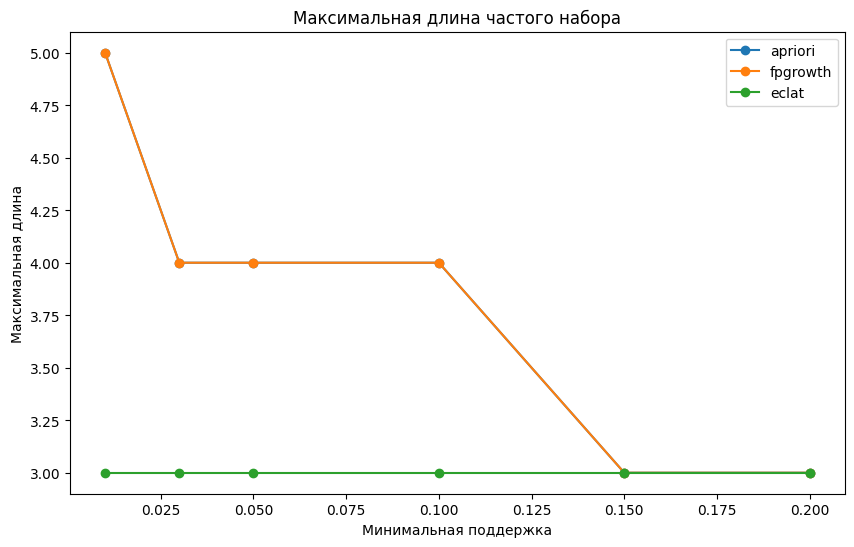

In [9]:
# максимальная длина набора
plt.figure(figsize=(10, 6))
for algo in results:
    max_lengths = []
    for supp in support_values:
        itemsets = results[algo][supp]['itemsets']['itemsets']
        if not itemsets.empty:
            max_len = max(len(i) for i in itemsets)
            max_lengths.append(max_len)
        else:
            max_lengths.append(0)
    plt.plot(support_values, max_lengths, label=algo, marker='o')
plt.xlabel('Минимальная поддержка')
plt.ylabel('Максимальная длина')
plt.legend()
plt.title('Максимальная длина частого набора')

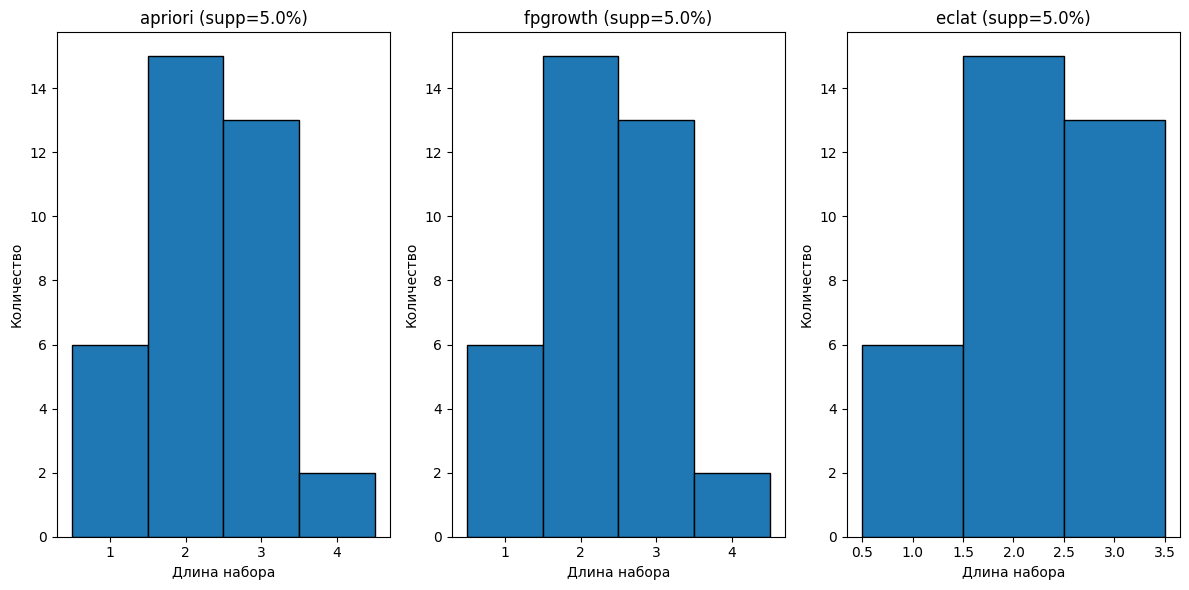

In [10]:
def plot_itemset_length_distribution(supp_value):
    plt.figure(figsize=(12, 6))
    for algo_idx, algo in enumerate(results):
        lengths = [len(i) for i in results[algo][supp_value]['itemsets']['itemsets']]
        max_len = max(lengths) if lengths else 0
        bins = range(1, max_len + 2)
        plt.subplot(1, 3, algo_idx + 1)
        plt.hist(lengths, bins=bins, align='left', edgecolor='black')
        plt.xlabel('Длина набора')
        plt.ylabel('Количество')
        plt.title(f'{algo} (supp={supp_value*100}%)')
    plt.tight_layout()

plot_itemset_length_distribution(0.05)